In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from sklearn.linear_model import LinearRegression

In [2]:
spdf=pd.read_excel("Loss_Amount_actual.xlsx", sheet_name="Sheet 1")

labels=['ID','Age','Car Model','Car Age','Car Cost','Insurance Amount/Premium','Accident Severity','Loss Amount']

In [3]:
#selecting only the annotated data and randomizing the rows
spdf=spdf.drop(spdf.index[165:200])
spdf_n=spdf.sample(frac=1).reset_index(drop=True)

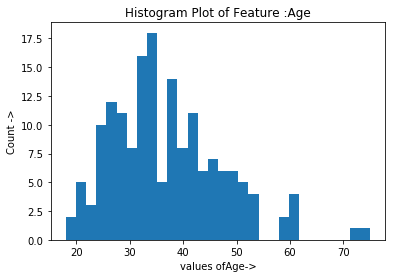

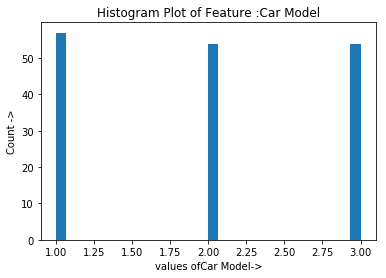

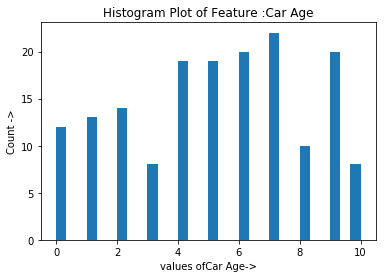

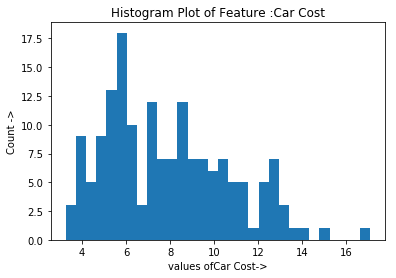

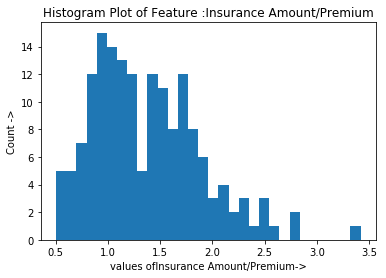

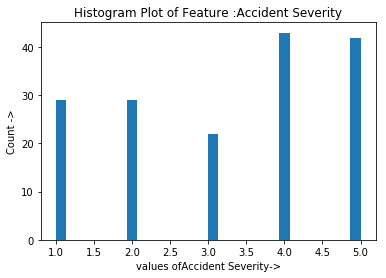

In [4]:
#plotting histograms
feature_labels=['Age','Car Model','Car Age','Car Cost','Insurance Amount/Premium','Accident Severity']
for i in range(len(feature_labels)):
    
    plt.hist(spdf[feature_labels[i]], bins = 30)
    plt.xlabel('values of'+feature_labels[i]+'->')
    plt.ylabel('Count ->')
    plt.title('Histogram Plot of Feature :'+feature_labels[i])
    plt.show()

In [5]:
# Normalizing Features
max_value=spdf_n.max(axis=0)
for i in range(1,len(labels)):
    spdf_n[labels[i]]/=max_value[labels[i]]

In [6]:
# Separating training and testing samples
train_df=spdf_n.iloc[:90,:].reset_index(drop=True)
test_df=spdf_n.iloc[90:,:].reset_index(drop=True)

In [7]:
#Considering usable columns
feature_labels=['Age','Car Model','Car Age','Car Cost','Insurance Amount/Premium','Accident Severity']
annotation_label=['Loss Amount']


In [8]:
#Training Linear Regression model
epochs=10
for i in range(epochs):
    train_df.sample(frac=1).reset_index(drop=True)
    temp_train=train_df.iloc[:(len(train_df)-10),:]
    temp_val=train_df.iloc[(len(train_df)-10):,:]
    train_X=np.array(temp_train[feature_labels].values)
    train_y=np.array(temp_train[annotation_label].values)
    reg = LinearRegression().fit(train_X, train_y)
    val_X=np.array(temp_val[feature_labels].values)
    val_y=np.array(temp_val[annotation_label].values)

In [9]:
test_X=np.array(test_df[feature_labels].values)
test_y=np.array(test_df[annotation_label].values)

In [10]:
# Predicting test sample data
pred_y=reg.predict(test_X)
reg.score(test_X,test_y)

0.7584991849663367

In [18]:
# Analysing predictions
results=pd.DataFrame({'Actual Loss Amount':test_y.flatten(),'Predicted Loss Amount':pred_y.flatten()})
L1=np.array([0,0])
results['L1 Norm']=np.abs(results['Actual Loss Amount'].values-results[ 'Predicted Loss Amount'])
print(results[0:5])
print('Mean L1 Norm for 75 test samples')
print(np.mean(results['L1 Norm']))
print('Standard Deviation of L1 Norm for 75 test samples')
print(np.std(results['L1 Norm']))

   Actual Loss Amount  Predicted Loss Amount   L1 Norm
0            0.060441               0.086051  0.025610
1            0.613878               0.587146  0.026732
2            0.257143               0.293654  0.036511
3            0.259331               0.352031  0.092700
4            0.522449               0.433201  0.089248
Mean L1 Norm for 75 test samples
0.08879388490608407
Standard Deviation of L1 Norm for 75 test samples
0.06362811957056849
